In [67]:
using GraphViz

function make_dot(params, hyperparams, consts, name)
  u = merge(consts, params, hyperparams)

    s = string("digraph ", name, " {")
  # Take each variable by turn
  for (varname, set) in u
    #println("Variable with name: ", varname)
    for var in set
            #println("index: ", var[2], " distribution and deps: ", var[7], typeof(var[7]))
            if !(typeof(var[7]) in [Symbol, Int64, Int])
                #println("trying var", var[7], " with type ", typeof(var[7]))
          for othervar in var[7][2]
                    ov = string(othervar)
                    if contains(ov, "[")
                        ov = replace(replace(ov, "[", "_"), "]", "")
                    end
                    s = string(s, ov, " -> ", varname, "_", var[2], ";\n")
          end
      end
    end
  end

  s = string(s, "}")

  #println("---------")
  #println(s)
    
    return s
end

function plot_graph(params, hyperparams, consts, name)
  return Graph(make_dot(params, hyperparams, consts, name))
end


plot_graph (generic function with 1 method)

In [60]:
consts= {:n=>Set{Any}({(:n,-1,:inf,:inf,Int64,(1,1),2)}),:d=>Set{Any}({(:d,-1,:inf,:inf,Int64,(1,1),2)})}
hyperparams = {:K=>Set{Any}({(:K,-1,:inf,:inf,Int64,(1,1),5)})}
params = {:pi=>Set{Any}({(:pi,-1,0.0,1.0,Float64,(:K,1),:unk)}),:sig=>Set{Any}({(:sig,1,:inf,:inf,Float64,(:d,:d),:unk),(:sig,2,:inf,:inf,Float64,(:d,:d),:unk),(:sig,5,:inf,:inf,Float64,(:d,:d),:unk),(:sig,3,:inf,:inf,Float64,(:d,:d),:unk),(:sig,4,:inf,:inf,Float64,(:d,:d),:unk)}),:z=>Set{Any}({(:z,1,:inf,:inf,nothing,(1,1),(:Categorical,{:pi})),(:z,2,:inf,:inf,nothing,(1,1),(:Categorical,{:pi})),(:z,3,:inf,:inf,nothing,(1,1),(:Categorical,{:pi})),(:z,4,:inf,:inf,nothing,(1,1),(:Categorical,{:pi})),(:z,5,:inf,:inf,nothing,(1,1),(:Categorical,{:pi}))}),:mu=>Set{Any}({(:mu,4,:inf,:inf,Float64,(:d,1),:unk),(:mu,2,:inf,:inf,Float64,(:d,1),:unk),(:mu,3,:inf,:inf,Float64,(:d,1),:unk),(:mu,1,:inf,:inf,Float64,(:d,1),:unk),(:mu,5,:inf,:inf,Float64,(:d,1),:unk)}),:x=>Set{Any}({(:x,1,:inf,:inf,nothing,(1,1),(:MultivariateNormal,{:(mu[1]),:(sig[1])})),(:x,2,:inf,:inf,nothing,(1,1),(:MultivariateNormal,{:(mu[1]),:(sig[1])})),(:x,3,:inf,:inf,nothing,(1,1),(:MultivariateNormal,{:(mu[1]),:(sig[1])})),(:x,4,:inf,:inf,nothing,(1,1),(:MultivariateNormal,{:(mu[1]),:(sig[1])})),(:x,5,:inf,:inf,nothing,(1,1),(:MultivariateNormal,{:(mu[1]),:(sig[1])}))})}


Dict{Any,Any} with 5 entries:
  :pi  => Set{Any}({(:pi,-1,0.0,1.0,Float64,(:K,1),:unk)})
  :sig => Set{Any}({(:sig,3,:inf,:inf,Float64,(:d,:d),:unk),(:sig,2,:inf,:inf,F…
  :z   => Set{Any}({(:z,4,:inf,:inf,nothing,(1,1),(:Categorical,{:pi})),(:z,5,:…
  :mu  => Set{Any}({(:mu,3,:inf,:inf,Float64,(:d,1),:unk),(:mu,1,:inf,:inf,Floa…
  :x   => Set{Any}({(:x,4,:inf,:inf,nothing,(1,1),(:MultivariateNormal,{:(mu[1]…

Variable with name: pi
Variable with name: K
Variable with name: sig
Variable with name: z
Variable with name: mu
Variable with name: n
Variable with name: x
Variable with name: d
---------
digraph GMM {pi -> z_4;
pi -> z_5;
pi -> z_2;
pi -> z_1;
pi -> z_3;
mu_1 -> x_4;
sig_1 -> x_4;
mu_1 -> x_5;
sig_1 -> x_5;
mu_1 -> x_3;
sig_1 -> x_3;
mu_1 -> x_2;
sig_1 -> x_2;
mu_1 -> x_1;
sig_1 -> x_1;
}


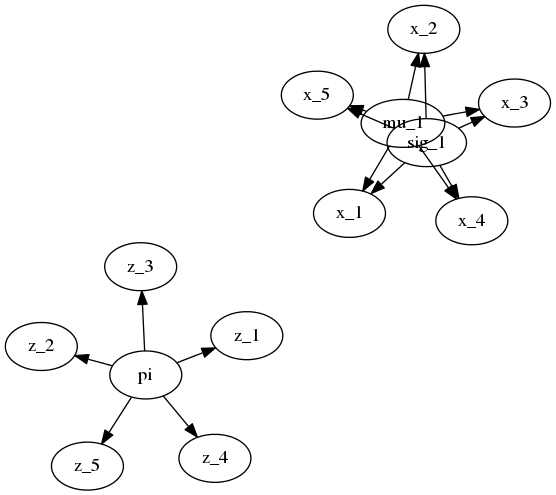

In [65]:
plot_graph(params, hyperparams, consts, "GMM")